In [2]:
from numpy.random import RandomState
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn import datasets

from sklearn.datasets import fetch_olivetti_faces
 
from sklearn import decomposition 
n_row, n_col = 2, 5
n_components = n_row * n_col
image_shape = (64, 64)
rng = RandomState(0)

In [3]:
%matplotlib inline

In [4]:
faces = fetch_olivetti_faces(data_home='./data',shuffle=True, random_state=rng)
#faces = datasets.fetch_olivetti_faces()
faces.data.shape

(400, 4096)

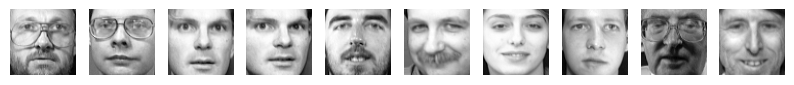

In [5]:
fig = plt.figure(figsize=(10, 10))
for i in range(10):
    ax = plt.subplot2grid((1, 10), (0, i))    
    ax.imshow(faces.data[i * 10].reshape(64, 64), cmap=plt.cm.gray)
    ax.axis('off')

In [6]:
pca = decomposition.PCA()
pca.fit(faces.data)

print(pca.components_.shape)

(400, 4096)


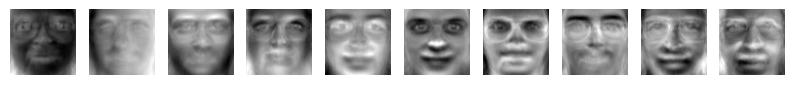

In [7]:
fig = plt.figure(figsize=(10, 10))
for i in range(10):
    ax = plt.subplot2grid((1, 10), (0, i))
    
    ax.imshow(pca.components_[i].reshape(64, 64), cmap=plt.cm.gray)
    ax.axis('off')

In [8]:
from skimage.io import imsave
face = faces.data[0]  
trans = pca.transform(face.reshape(1, -1))  

In [9]:
trans.shape

(1, 400)

In [10]:
for k in range(400):
    rank_k_approx = trans[:, :k].dot(pca.components_[:k]) + pca.mean_
    if k % 10 == 0:
        imsave('{:>03}'.format(str(k)) + '.jpg', rank_k_approx.reshape(64, 64))

OSError: cannot write mode F as JPEG